In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv("Datos_limpios_Berlin2.csv")
df.head()

,Unnamed: 0,id,scrape_id,name,description,host_id,host_name,host_response_time,host_is_superhost,host_has_profile_pic,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2084992,20241221052002,"Nice and cozy apartment in Kreuzberg, Graefekiez",Our cosy two room Apartment (70qm) in a vibrat...,6302373,Andreas,within an hour,f,t,...,5.0,4.91,5.00,4.64,4.82,1.0,1.0,0.0,0.0,0.09
1,1,1123383729460847373,20241221052002,Furnished room in well equipped serviced apart...,Room in an apartment available. Apartment has ...,206488801,Supriya,within an hour,f,t,...,4.7,4.80,4.80,4.80,4.70,3.0,1.0,2.0,0.0,3.00
2,2,1205255838613758737,20241221052002,Luxurous game room with private bath in X-Berg,Cozy private room in Berlin Mitte with private...,50009901,Gabriel,within an hour,t,t,...,5.0,4.97,4.97,4.94,4.94,1.0,0.0,1.0,0.0,1.60
3,3,8164759,20241221052002,Beautiful single-room studio,Experience the “real Berlin” in our small and ...,42115726,Lars,within an hour,f,t,...,4.8,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,0.01
4,4,18836877,20241221052002,Unterkunft zentral in Berlin,"The accommodation has 3 rooms, however, is onl...",131184702,Jana,within an hour,f,t,...,4.7,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,3.00


In [16]:
df =df.drop(columns=["Unnamed: 0"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13984 non-null  int64  
 1   scrape_id                                     13984 non-null  int64  
 2   name                                          13984 non-null  object 
 3   description                                   13984 non-null  object 
 4   host_id                                       13984 non-null  int64  
 5   host_name                                     13984 non-null  object 
 6   host_response_time                            13984 non-null  object 
 7   host_is_superhost                             13984 non-null  object 
 8   host_has_profile_pic                          13984 non-null  object 
 9   host_identity_verified                        13984 non-null 

# convertir cualitativas que se van a usar a numericas
(host_is_superhost, host_has_profile_pic, host_identity_verified, instant_bookable, host_response_time) 

In [18]:
df["host_is_superhost"]= df["host_is_superhost"].replace({"t":"1"}, regex=False)
df["host_is_superhost"]= df["host_is_superhost"].replace({"f":"0"}, regex=False)
df["host_is_superhost"]=df["host_is_superhost"].astype(int)

In [19]:
df["host_has_profile_pic"]= df["host_has_profile_pic"].replace({"t":"1"}, regex=False)
df["host_has_profile_pic"]= df["host_has_profile_pic"].replace({"f":"0"}, regex=False)
df["host_has_profile_pic"]=df["host_has_profile_pic"].astype(int)

In [20]:
df["host_identity_verified"]= df["host_identity_verified"].replace({"t":"1"}, regex=False)
df["host_identity_verified"]= df["host_identity_verified"].replace({"f":"0"}, regex=False)
df["host_identity_verified"]=df["host_identity_verified"].astype(int)

In [21]:
df["instant_bookable"]= df["instant_bookable"].replace({"t":"1"}, regex=False)
df["instant_bookable"]= df["instant_bookable"].replace({"f":"0"}, regex=False)
df["instant_bookable"]=df["instant_bookable"].astype(int)

In [22]:
df["host_response_time"]= df["host_response_time"].replace({"within an hour":"1"}, regex=False)
df["host_response_time"]= df["host_response_time"].replace({"within a few hours":"0"}, regex=False)
df["host_response_time"]= df["host_response_time"].replace({"within a day":"0"}, regex=False)
df["host_response_time"]= df["host_response_time"].replace({"a few days or more":"0"}, regex=False)
df["host_response_time"]=df["host_response_time"].astype(int)

In [23]:
cualitativas = df.select_dtypes(include=["object","datetime","category"])
cuantitativas = df.select_dtypes(include=["float64","int64","float","int"])

In [24]:
cuantitativas.head()

,id,scrape_id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2084992,20241221052002,6302373,1,0,1,1,0,1.0,1.0,...,5.0,4.91,5.00,4.64,4.82,1.0,1.0,0.0,0.0,0.09
1,1123383729460847373,20241221052002,206488801,1,0,1,1,0,7.0,7.0,...,4.7,4.80,4.80,4.80,4.70,3.0,1.0,2.0,0.0,3.00
2,1205255838613758737,20241221052002,50009901,1,1,1,1,0,1.0,1.0,...,5.0,4.97,4.97,4.94,4.94,1.0,0.0,1.0,0.0,1.60
3,8164759,20241221052002,42115726,1,0,1,1,0,1.0,3.0,...,4.8,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,0.01
4,18836877,20241221052002,131184702,1,0,1,1,0,1.0,1.0,...,4.7,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,3.00


Analizar 10 casos de correlación logística que existe entre diferentes variables de nuestra base de datos, aplicando la herramienta de “Regresión Logística”

In [25]:
Corr_Factors =cuantitativas.corr()
Corr_Factors = abs(Corr_Factors)
Corr_Factors.head()

,id,scrape_id,host_id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.506587,0.008326,0.015111,0.156596,0.137866,0.149853,0.080381,0.095255,...,0.018293,0.074355,0.056183,0.005646,0.003173,0.097232,0.122982,0.113059,NaN,0.361431
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.506587,NaN,1.000000,0.062815,0.022312,0.248514,0.060680,0.302426,0.179473,0.126223,...,0.056746,0.105571,0.129840,0.063968,0.088898,0.187494,0.094549,0.109831,NaN,0.262936
host_response_time,0.008326,NaN,0.062815,1.000000,0.163130,0.048243,0.042071,0.232394,0.141590,0.136112,...,0.000722,0.012388,0.025113,0.063512,0.077501,0.120002,0.051329,0.022070,NaN,0.123376
host_is_superhost,0.015111,NaN,0.022312,0.163130,1.000000,0.057091,0.120011,0.050308,0.119343,0.134503,...,0.197057,0.136649,0.166884,0.022902,0.056369,0.136908,0.081000,0.018810,NaN,0.165588


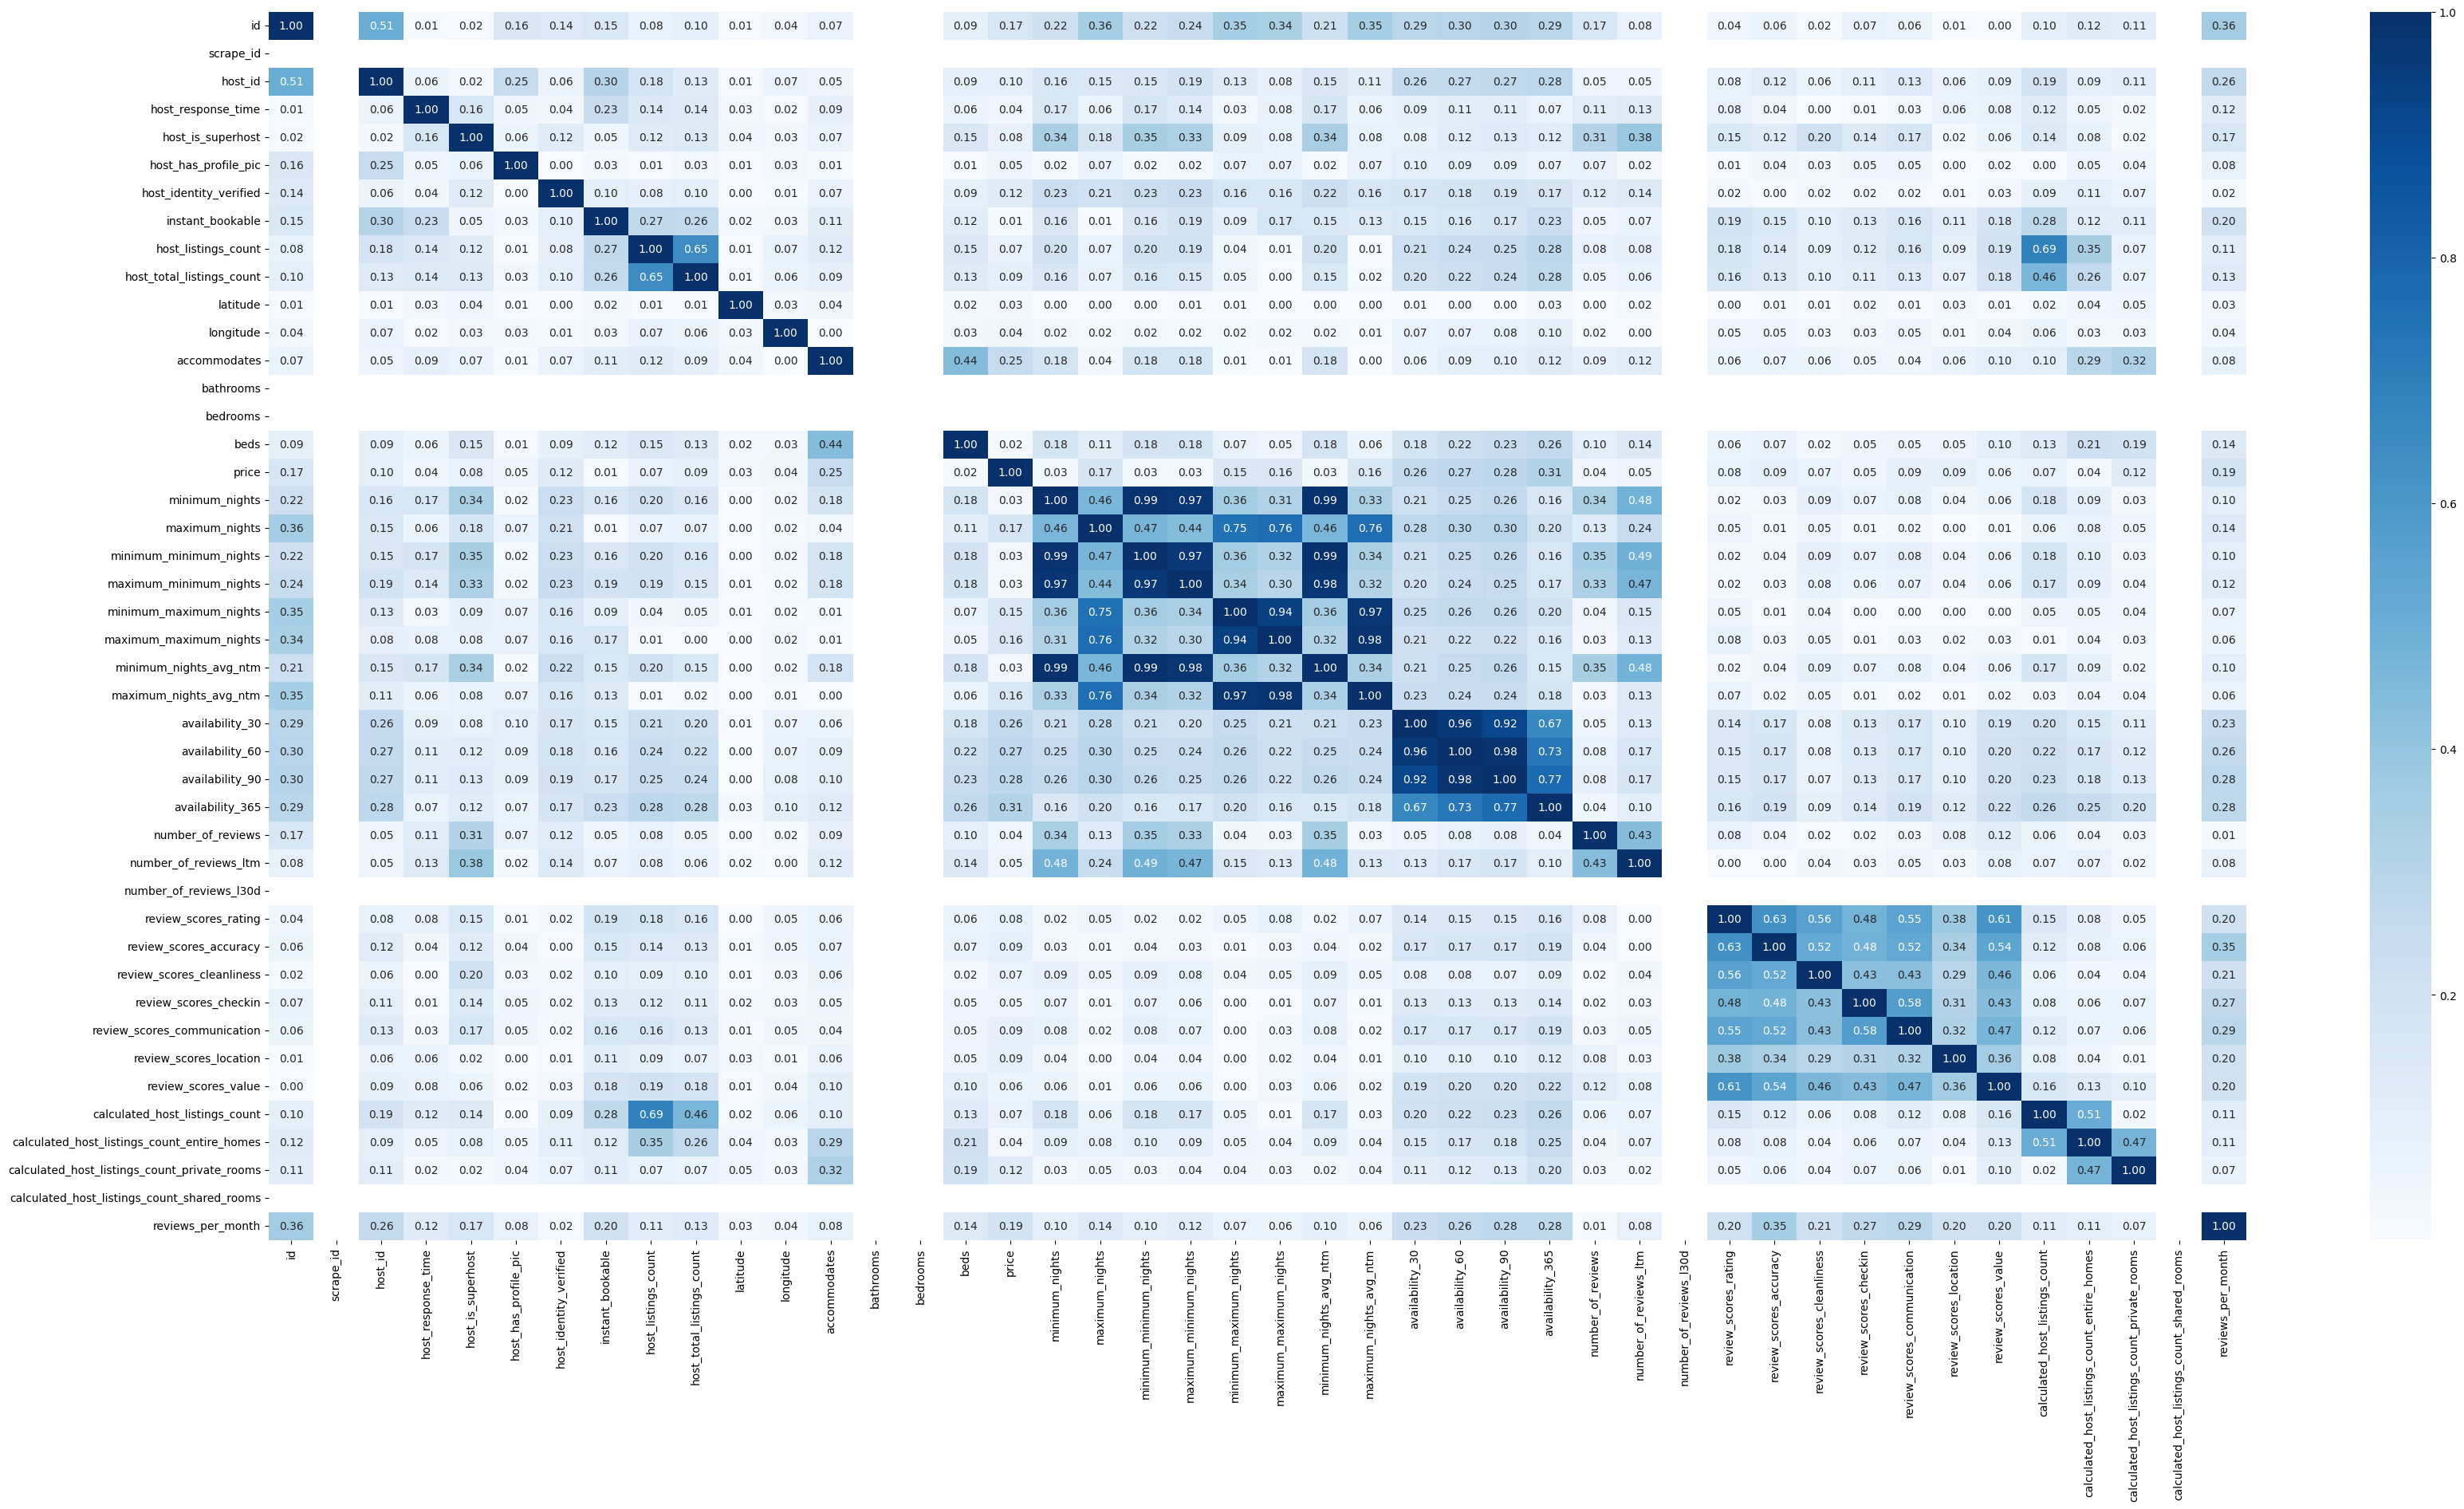

In [26]:
plt.figure(figsize=(40, 20))
heat_map = sns.heatmap(Corr_Factors, cmap="Blues", annot=True, fmt=".2f")

Para todas los modelos se usaron las 3 correlaciones más altas como variables independientes

# host_is_superhost

In [27]:
Var_Indep = df[["number_of_reviews_ltm","minimum_minimum_nights","minimum_nights"]]
Var_Dep= df["host_is_superhost"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(4196,))

In [29]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print("la sensibilidad del modelo es")
print(sensibilidad)


Matriz de confusión
[[3049  189]
 [ 751  207]]
Precision del modelo
0.5227272727272727
Exactitud del modelo
0.7759771210676835
la sensibilidad del modelo es
0.2160751565762004


In [30]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print("la sensibilidad del modelo es")
print(sensibilidad)


Matriz de confusión
[[3049  189]
 [ 751  207]]
Precision del modelo
0.8023684210526316
Exactitud del modelo
0.7759771210676835
la sensibilidad del modelo es
0.9416306361951822


# host_has_profile_pic

In [31]:
Var_Indep = df[["host_id","id","availability_30"]]
Var_Dep= df["host_has_profile_pic"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(4196,))

In [33]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  100]
 [   0 4096]]
Precision del modelo
0.9761677788369876
Exactitud del modelo
0.9761677788369876
la sensibilidad del modelo es
1.0


In [34]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  100]
 [   0 4096]]
Precision del modelo
0.0
Exactitud del modelo
0.9761677788369876
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# host_identity_verified

In [35]:
Var_Indep = df[["maximum_minimum_nights","minimum_minimum_nights","minimum_nights"]]
Var_Dep= df["host_identity_verified"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(4196,))

In [37]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  374]
 [   4 3818]]
Precision del modelo
0.9107824427480916
Exactitud del modelo
0.9099142040038132
la sensibilidad del modelo es
0.998953427524856


In [38]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  374]
 [   4 3818]]
Precision del modelo
0.0
Exactitud del modelo
0.9099142040038132
la sensibilidad del modelo es
0.0


# instant_bookable

In [83]:
Var_Indep = df[["host_id","calculated_host_listings_count","host_listings_count"]]
Var_Dep= df["instant_bookable"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [84]:
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], shape=(4196,))

In [85]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[2797  231]
 [ 833  335]]
Precision del modelo
0.5918727915194346
Exactitud del modelo
0.7464251668255482
la sensibilidad del modelo es
0.2868150684931507


In [86]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[2797  231]
 [ 833  335]]
Precision del modelo
0.7705234159779615
Exactitud del modelo
0.7464251668255482
la sensibilidad del modelo es
0.9237120211360634


# host_response_time

In [42]:
Var_Indep = df[["instant_bookable","minimum_minimum_nights","minimum_nights_avg_ntm"]]
Var_Dep= df["host_response_time"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], shape=(4196,))

In [44]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[ 582 1034]
 [ 683 1897]]
Precision del modelo
0.6472193790515183
Exactitud del modelo
0.5908007626310772
la sensibilidad del modelo es
0.7352713178294573


In [45]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[ 582 1034]
 [ 683 1897]]
Precision del modelo
0.4600790513833992
Exactitud del modelo
0.5908007626310772
la sensibilidad del modelo es
0.36014851485148514


# Remplazar valores de 5 variables no dicotomicas y aplicar la regresion logistica

Price, reviews_per_month, accommodates, minimum_nights y maximum_nights

# Price

In [46]:
Max=cuantitativas["price"].max()
Min=cuantitativas["price"].min()
Limites=[Min, Max]
Limites


[np.float64(10.0), np.float64(219.0)]

In [47]:
intervalos = np.linspace(9, 219.1, 3)
intervalos

array([  9.  , 114.05, 219.1 ])

In [48]:
categorias = ["menor de 114", "mayor de 114"]
cuantitativas["price"]=pd.cut(x=cuantitativas["price"], bins=intervalos, labels= categorias)

In [49]:
cuantitativas["price"]

0        mayor de 114
1        mayor de 114
2        menor de 114
3        mayor de 114
4        mayor de 114
             ...     
13979    mayor de 114
13980    menor de 114
13981    mayor de 114
13982    mayor de 114
13983    menor de 114
Name: price, Length: 13984, dtype: category
Categories (2, object): ['menor de 114' < 'mayor de 114']

In [50]:
Var_Indep = cuantitativas[["availability_365","availability_90","availability_60"]]
Var_Dep= cuantitativas["price"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['menor de 114', 'menor de 114', 'mayor de 114', ...,
       'menor de 114', 'menor de 114', 'menor de 114'],
      shape=(4196,), dtype=object)

In [52]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="mayor de 114")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="mayor de 114")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1659  593]
 [ 684 1260]]
Precision del modelo
0.708066581306018
Exactitud del modelo
0.6956625357483317
la sensibilidad del modelo es
0.7366785079928952


In [53]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="menor de 114")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="menor de 114")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1659  593]
 [ 684 1260]]
Precision del modelo
0.6799784133837021
Exactitud del modelo
0.6956625357483317
la sensibilidad del modelo es
0.6481481481481481


# reviews per month

In [54]:
Max=cuantitativas["reviews_per_month"].max()
Min=cuantitativas["reviews_per_month"].min()
Limites=[Min, Max]
Limites

[np.float64(0.01), np.float64(7.17)]

In [55]:
intervalos = np.linspace(0.001, 7.18, 3)
intervalos

array([1.0000e-03, 3.5905e+00, 7.1800e+00])

In [56]:
categorias = ["menor de 3.59", "mayor de 3.60"]
cuantitativas["reviews_per_month"]=pd.cut(x=cuantitativas["reviews_per_month"], bins=intervalos, labels= categorias)

In [57]:
cuantitativas["reviews_per_month"]

0        menor de 3.59
1        menor de 3.59
2        menor de 3.59
3        menor de 3.59
4        menor de 3.59
             ...      
13979    menor de 3.59
13980    menor de 3.59
13981    menor de 3.59
13982    menor de 3.59
13983    menor de 3.59
Name: reviews_per_month, Length: 13984, dtype: category
Categories (2, object): ['menor de 3.59' < 'mayor de 3.60']

In [58]:
Var_Indep = cuantitativas[["id","review_scores_accuracy","review_scores_communication"]]
Var_Dep= cuantitativas["reviews_per_month"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['menor de 3.59', 'menor de 3.59', 'menor de 3.59', ...,
       'menor de 3.59', 'menor de 3.59', 'menor de 3.59'],
      shape=(4196,), dtype=object)

In [60]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="mayor de 3.60")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="mayor de 3.60")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  244]
 [   0 3952]]
Precision del modelo
0.0
Exactitud del modelo
0.9418493803622497
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="menor de 3.59")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="menor de 3.59")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  244]
 [   0 3952]]
Precision del modelo
0.9418493803622497
Exactitud del modelo
0.9418493803622497
la sensibilidad del modelo es
1.0


# accomodates

In [62]:
Max=cuantitativas["accommodates"].max()
Min=cuantitativas["accommodates"].min()
Limites=[Min, Max]
Limites

[np.float64(1.0), np.float64(7.0)]

In [63]:
intervalos = np.linspace(0.9, 7.1, 3)
intervalos

array([0.9, 4. , 7.1])

In [64]:
categorias = ["menor de 4", "mayor de 4"]
cuantitativas["accommodates"]=pd.cut(x=cuantitativas["accommodates"], bins=intervalos, labels= categorias)

In [65]:
Var_Indep = cuantitativas[["beds","calculated_host_listings_count_private_rooms","calculated_host_listings_count_entire_homes"]]
Var_Dep= cuantitativas["accommodates"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['menor de 4', 'menor de 4', 'menor de 4', ..., 'mayor de 4',
       'menor de 4', 'menor de 4'], shape=(4196,), dtype=object)

In [67]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="mayor de 4")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="mayor de 4")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[ 516  650]
 [ 293 2737]]
Precision del modelo
0.6378244746600742
Exactitud del modelo
0.7752621544327931
la sensibilidad del modelo es
0.4425385934819897


In [68]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="menor de 4")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="menor de 4")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[ 516  650]
 [ 293 2737]]
Precision del modelo
0.8080897549453794
Exactitud del modelo
0.7752621544327931
la sensibilidad del modelo es
0.9033003300330033


# minimum nights

In [69]:
Max=cuantitativas["minimum_nights"].max()
Min=cuantitativas["minimum_nights"].min()
Limites=[Min, Max]
Limites

[np.float64(1.0), np.float64(227.0)]

In [70]:
intervalos = np.linspace(0.9, 227.1, 3)
intervalos

array([  0.9, 114. , 227.1])

In [71]:
categorias = ["menor de 114", "mayor de 114"]
cuantitativas["minimum_nights"]=pd.cut(x=cuantitativas["minimum_nights"], bins=intervalos, labels= categorias)

In [72]:
Var_Indep = cuantitativas[["minimum_nights_avg_ntm","minimum_minimum_nights","maximum_minimum_nights"]]
Var_Dep= cuantitativas["minimum_nights"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['menor de 114', 'menor de 114', 'menor de 114', ...,
       'menor de 114', 'menor de 114', 'menor de 114'],
      shape=(4196,), dtype=object)

In [74]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="mayor de 114")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="mayor de 114")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[  44   14]
 [   2 4136]]
Precision del modelo
0.9565217391304348
Exactitud del modelo
0.996186844613918
la sensibilidad del modelo es
0.7586206896551724


In [75]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="menor de 114")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="menor de 114")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[  44   14]
 [   2 4136]]
Precision del modelo
0.9966265060240964
Exactitud del modelo
0.996186844613918
la sensibilidad del modelo es
0.9995166747220879


# maximum nights

In [76]:
Max=cuantitativas["maximum_nights"].max()
Min=cuantitativas["maximum_nights"].min()
Limites=[Min, Max]
Limites

[np.float64(1.0), np.float64(1414.0)]

In [77]:
intervalos = np.linspace(0.9, 1414.1, 3)
intervalos

array([9.0000e-01, 7.0750e+02, 1.4141e+03])

In [78]:
categorias = ["menor de 707", "mayor de 707"]
cuantitativas["maximum_nights"]=pd.cut(x=cuantitativas["maximum_nights"], bins=intervalos, labels= categorias)

In [79]:
Var_Indep = cuantitativas[["maximum_maximum_nights","maximum_nights_avg_ntm","minimum_maximum_nights"]]
Var_Dep= cuantitativas["maximum_nights"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['mayor de 707', 'mayor de 707', 'mayor de 707', ...,
       'menor de 707', 'menor de 707', 'mayor de 707'],
      shape=(4196,), dtype=object)

In [81]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="mayor de 707")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="mayor de 707")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1586   94]
 [ 463 2053]]
Precision del modelo
0.7740361151781356
Exactitud del modelo
0.867254528122021
la sensibilidad del modelo es
0.944047619047619


In [82]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="menor de 707")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="menor de 707")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1586   94]
 [ 463 2053]]
Precision del modelo
0.9562179785747554
Exactitud del modelo
0.867254528122021
la sensibilidad del modelo es
0.8159777424483307
